# INFO-F-305 - TP 5 - 6
# Simulation à l'aide d'Octave
### Jacopo De Stefani - __[jdestefa@ulb.ac.be](mailto:jdestefa@ulb.ac.be)__
### Github: https://github.com/jdestefani/ulb-infof305-1819
### Slides: https://jdestefani.github.io/ulb-infof305-1819/

# Projet

- Analyse d'un ensemble des systèmes avec Octave
- Groupes de 1-2 personnes.
- 2 x Séances TP en salle machine + Travail personnel
- Durée: 2 semaines
- A remettre: Jupyter Notebook/Rapport LaTeX sur UV
- Note: 0-2/20

# Comment installer Octave / Jupyter?

- **Octave**: Plus d'informations ici: https://www.gnu.org/software/octave/
- **Jupyter Notebook**: https://jupyter.readthedocs.io/en/latest/install.html
- **Octave kernel for Jupyter**: https://github.com/Calysto/octave_kernel
- **Symbolic package (Octave forge)**: https://octave.sourceforge.io/symbolic/index.html


# Comment utiliser les notebooks?

1. Installer Octave, Jupyter Notebook et le kernel Octave pour Jupyter.
2. Se déplacer dans le dossier où les notebooks sont stockés.
3. Démarrer ```jupyter notebook``` 
4. Selectionner le notebook dans l'interface web. 


# Cas d'étude 1 - Intégrateur simple

$\begin{cases}
\dot{x}(t)=cu(t),\\
y(t)=x(t)\end{cases}$

- Conditions initiales: $x(0)=1$ 
- Valeurs paramètres: $c=1$ 
- Temps de simulation: $[0,10]$ 
- Fonction(s) d'entrée: $u(t)=\sin(t)$



c =  0.50000
ode_sys =

@(t, x) [c * sin(t)]



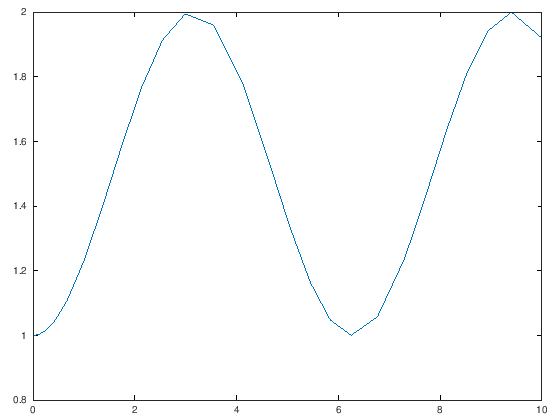

In [27]:
# Implémentation 1
c = 0.5 # Paramètre
ode_sys = @(t,x) [c*sin(t)] # Définition système
[t,x] = ode23 (ode_sys, [0, 10], [1]); # Résolution système
plot(t,x)

c =  0.50000
ode_sys = f(t, x) = [0.500000*sin(t)]


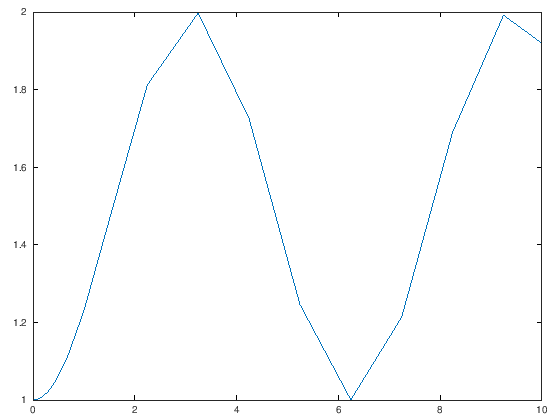

In [28]:
# Implémentation 2
c = 0.5 # Paramètre
ode_sys = inline(sprintf('[%f*sin(t)]',c),'t','x') # Définition système
[ts,ys] = ode45(ode_sys,[0,10],[1]); # Résolution système
plot(ts,ys)

# Cas d'étude 2: croissance et décroissance exponentielle

$\begin{cases}
\dot{x}(t)=cx(t)\\
y(t)=x(t)\end{cases}$

- Conditions initiales: $x(0)=1$ 
- Valeurs paramètres: $c=0.1$ 
- Intervalle de temps de simulation $[0,10]$. 
- Fonction(s) d'entrée: néant 


c =  0.10000
ode_sys =

@(t, x) [c * x(1)]



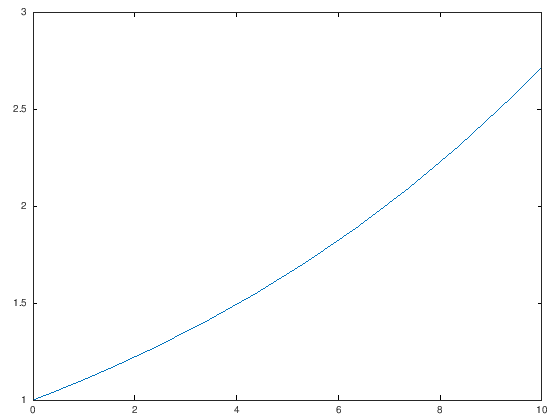

In [29]:
# Implémentation 1
c = 0.1 # Paramètre
ode_sys = @(t,x) [c*x(1)] # Définition système
[t,x] = ode23 (ode_sys, [0, 10], [1]); # Résolution système
plot(t,x)

c =  0.10000
ode_sys = f(t, x) = [0.100000*x(1)]


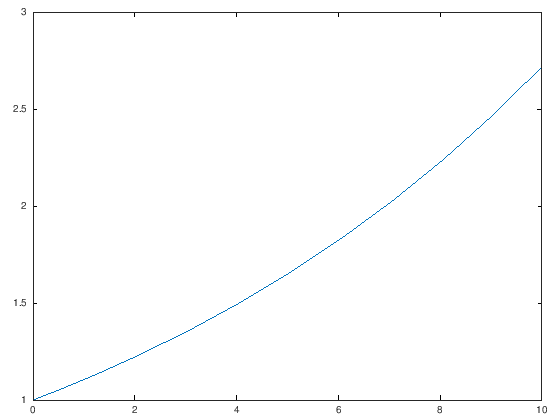

In [30]:
# Implémentation 2
c = 0.1 # Paramètre
ode_sys = inline(sprintf('[%f*x(1)]',c),'t','x') # Définition système
[ts,ys] = ode45(ode_sys,[0,10],[1]); # Résolution système
plot(ts,ys)

# Cas d'étude 3: système avec retard d'ordre 1

$\begin{cases}
\dot{x}(t)=u(t)-cx(t)\\
y(t)=x(t)\end{cases}$
 
- Conditions initiales: $x(0)=1$ 
- Valeurs paramètres: $c=2$ 
- Intervalle de temps de simulation $[0,10]$. 
- Fonction(s) d'entrée: $u(t)=1$ pour $t>0$. 


c =  2
ode_sys =

@(t, x) [1 - c * x(1)]



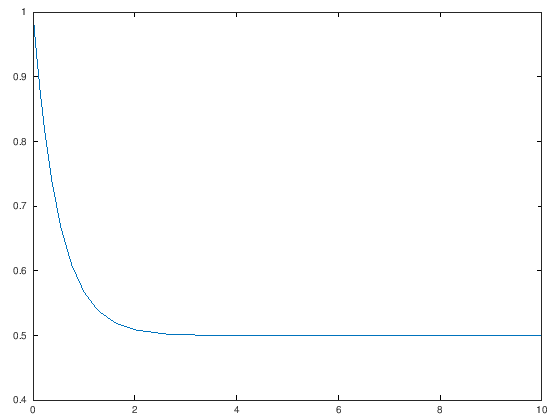

In [31]:
# Implémentation 1
c = 2 # Paramètre
ode_sys = @(t,x) [1-c*x(1)] # Définition système
[t,x] = ode23 (ode_sys, [0, 10], [1]); # Résolution système
plot(t,x)

c =  2
ode_sys = f(t, x) = [1-2.000000*x(1)]


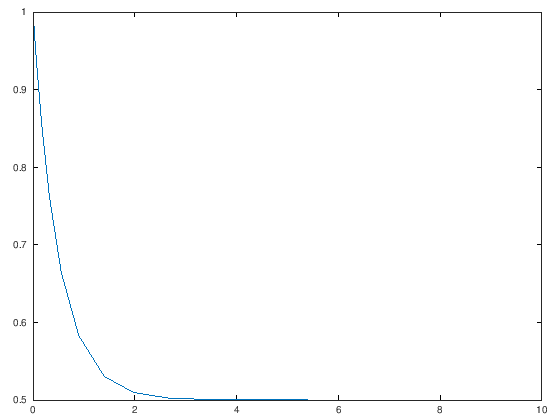

In [32]:
# Implémentation 2
c = 2 # Paramètre
ode_sys = inline(sprintf('[1-%f*x(1)]',c),'t','x') # Définition système
[ts,ys] = ode45(ode_sys,[0,10],[1]); # Résolution système
plot(ts,ys)

# Cas d'étude 4: croissance logistique

$\begin{cases}
\dot{x}(t)=cx(t)(1-\frac{x(t)}{k})\\
y(t)=x(t)\end{cases}$

- Conditions initiales: $x(0)=0.3$ 
- Valeurs paramètres: $k=1.5$, $c=0.2$ 
- Intervalle de temps de simulation $[0,50]$. 
- Fonction(s) d'entrée: néant 


c =  0.20000
k =  1.5000
ode_sys =

@(t, x) [c * x(1) * (1 - x(1) / k)]



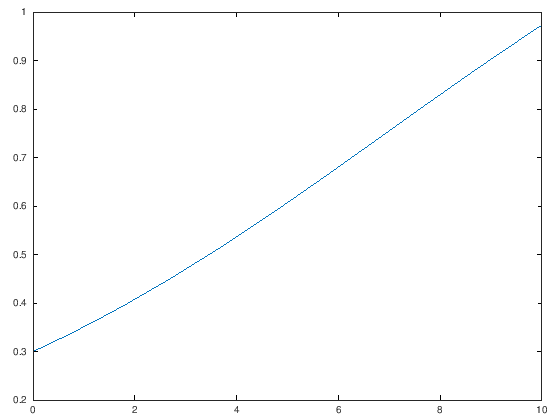

In [33]:
# Implémentation 1
c = 0.2 # Paramètre
k = 1.5 # Paramètre
ode_sys = @(t,x) [c*x(1)*(1-x(1)/k)] # Définition système
[t,x] = ode23 (ode_sys, [0, 10], [0.3]); # Résolution système
plot(t,x)

c =  0.20000
k =  1.5000
ode_sys = f(t, x) = [0.200000*x(1)*(1-x(1)/1.500000)]


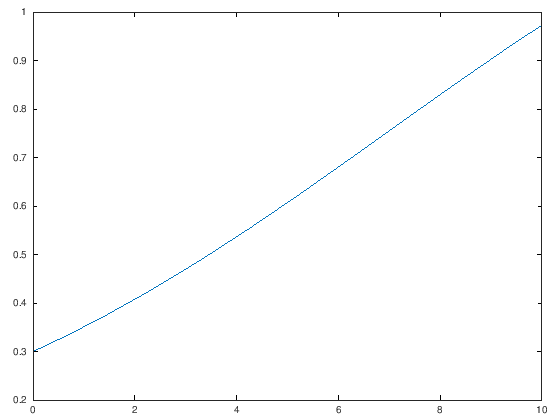

In [34]:
# Implémentation 2
c = 0.2 # Paramètre
k = 1.5 # Paramètre
ode_sys = inline(sprintf('[%f*x(1)*(1-x(1)/%f)]',c,k),'t','x') # Définition système
[ts,ys] = ode45(ode_sys,[0,10],[0.3]); # Résolution système
plot(ts,ys)

# Système du second ordre - Bases

$\dot{\mathbf{X}}(t) = \mathbf{A}\mathbf{X}(t)$

$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}a_{11} & a_{12}\\
a_{21} & a_{22}\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$

1. Dessin d'une trajectoire
2. Dessin des droites invariantes
3. Dessin des isoclines
4. Dessin du portrait de phase
5. Dessin du diagramme tr(A) - det(A)


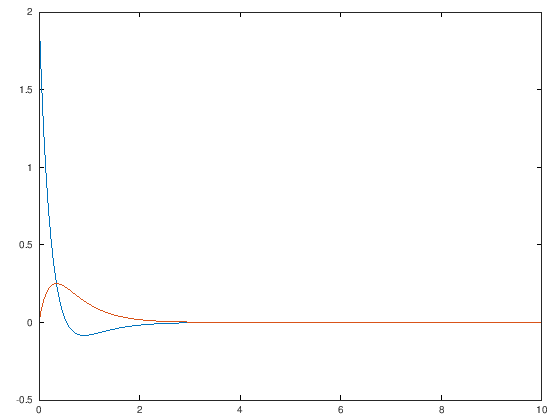

In [35]:
# Implémentation 1
A = [-5 -3; 1 -1];
ode_sys = @(t,x) [A(1,1)*x(1)+A(1,2)*x(2);A(2,1)*x(1)+A(2,2)*x(2)]; # Définition système
[t,x] = ode23 (ode_sys, [0, 10], [2, 0]); # Résolution système
plot(t,x)

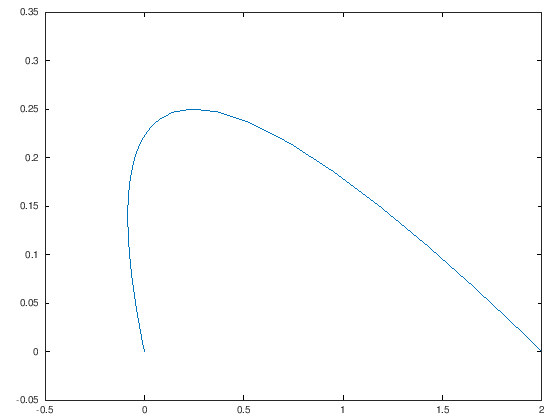

In [36]:
plot(x(:,1),x(:,2))

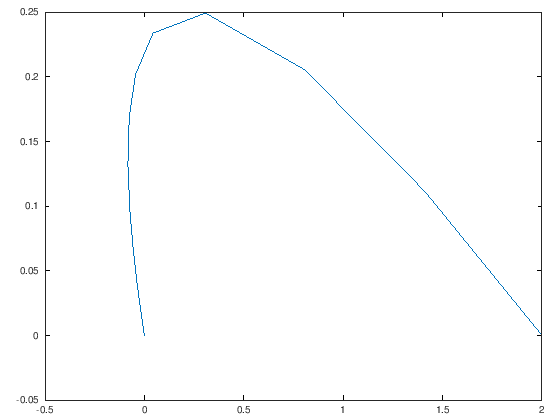

In [37]:
# Implémentation 2
A = [-5 -3; 1 -1];
sys_str = sprintf('[%f*x(1)+%f*x(2);%f*x(1)+%f*x(2)]',A(1,1),A(1,2),A(2,1),A(2,2)); # Définition système (1)
sys_ode = inline(sys_str,'t','x'); # Définition système (2)
[ts,ys] = ode45(sys_ode,[0,20],[2,0]); # Résolution système
plot(ys(:,1),ys(:,2))

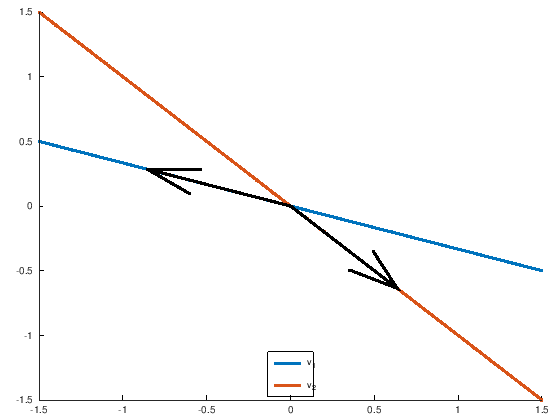

In [38]:
# 2. Dessiner les droites correspondants aux vecteurs propres et le sense des trajectoires associés
[V,L] = eig(A);
line_range = -1.5:.1:1.5;
eigenvector_1 = (V(2,1)/V(1,1)) * line_range;
eigenvector_2 = (V(2,2)/V(1,2)) * line_range;
hold on;
plot(line_range,eigenvector_1,"linewidth",10);
plot(line_range,eigenvector_2,"linewidth",10);
quiver([0;0],[0;0],V(1,:),V(2,:),"linewidth",10,"color","k");
legend("v_1","v_2","location","south");


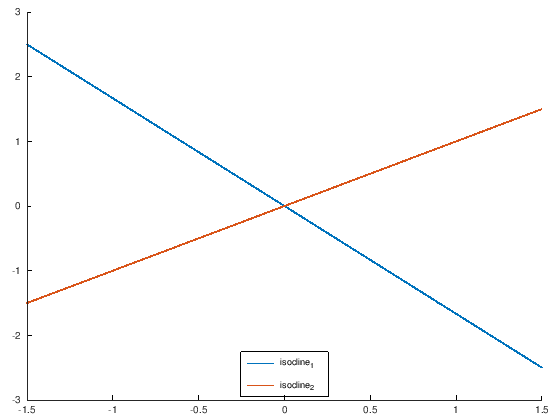

In [39]:
# 3. Calculer les isoclines
line_range = -1.5:.1:1.5;
isocline_1 = -(A(1,1)/A(1,2)) * line_range;
isocline_2 = -(A(2,1)/A(2,2)) * line_range;
hold on;
plot(line_range,isocline_1,"linewidth",5);
plot(line_range,isocline_2,"linewidth",5);
legend("isocline_1","isocline_2","location","south");

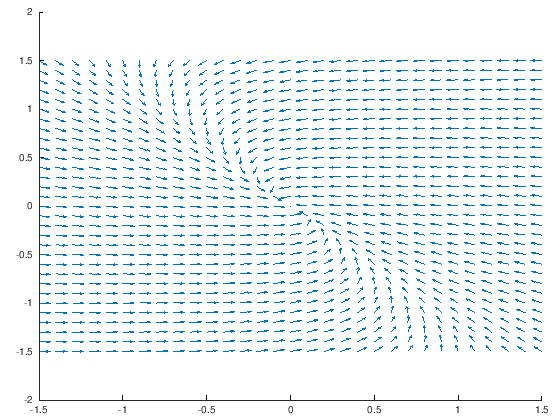

In [40]:
# 4. Portrait de phase
#Define grid for plotting
x1range=-1.5:.1:1.5;
x2range=-1.5:.1:1.5;
[x1,x2] = meshgrid(x1range, x2range);

# Define the system to plot (based on matrix A)
x1p = A(1,1)*x1+A(1,2)*x2;
x2p = A(2,1)*x1+A(2,2)*x2;

#Normalize values for plotting
norms=sqrt(x1p.^2+x2p.^2);
# Vector field plot
hold on;
quiver(x1,x2,x1p./norms,x2p./norms,0.5);

In [41]:
pkg load symbolic
syms x1(t) x2(t);
ode_sys = [diff(x1(t),t) == A(1,1)*x1(t) + A(1,2)*x2(t);  diff(x2(t),t) == A(2,1)*x1(t) + A(2,2)*x2(t)]
solutions = dsolve(ode_sys);
solutions{1}
solutions{2}

ode_sys = (sym 2×1 matrix)

  ⎡d                             ⎤
  ⎢──(x₁(t)) = -5⋅x₁(t) - 3⋅x₂(t)⎥
  ⎢dt                            ⎥
  ⎢                              ⎥
  ⎢  d                           ⎥
  ⎢  ──(x₂(t)) = x₁(t) - x₂(t)   ⎥
  ⎣  dt                          ⎦

ans = (sym)

                  -2⋅t         -4⋅t
  x₁(t) = - 3⋅C₁⋅ℯ     - 3⋅C₂⋅ℯ    

ans = (sym)

                -2⋅t       -4⋅t
  x₂(t) = 3⋅C₁⋅ℯ     + C₂⋅ℯ    



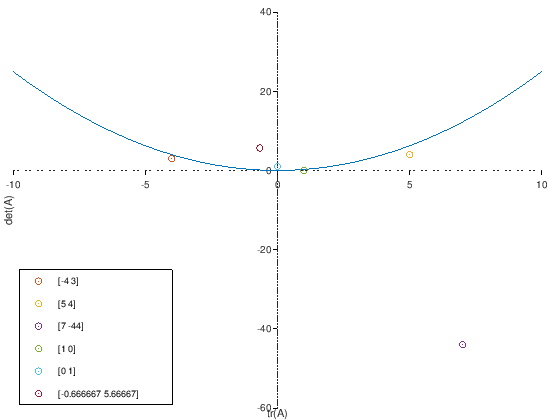

In [42]:
# Plan Tr(A)-det(A)

x = -10:0.1:10;
plot (x, 1/4*x.^2);
hold on;
A_vec = [[-2 1; 1 -2];[2 1; 2 3];[5 9; 6 2];[0 1; 0 1];[0 -1; 1 0];[1/3 -2; 3 -1]]; #cbind like
i = 0;
while i<(rows(A_vec)/2)# Column-wise iteration
    A = A_vec(2*i+1:2*(i+1),1:2); # Get the proper submatrix
    plot(trace(A),det(A),sprintf(";[%d %d];o",trace(A),det(A)))
    i++;
endwhile
set(gca, "xaxislocation", "origin");
set(gca, "yaxislocation", "origin");
h = legend; legend(h,"location","southwest");
xlabel("tr(A)");
ylabel("det(A)");
box off;
hold off;